In [34]:
from pathlib import Path
import os

# Establece la raíz del proyecto manualmente
project_root = Path("F:/JCMDataCenter/Cursos/Evolve Academy/Data Scientist IA/Futpeak") # sobremesa
#project_root = Path("C:/Users/juanm/Desktop/FUTPEAK/Futpeak") # portátil

# Cambia el directorio de trabajo actual a esa raíz
os.chdir(project_root)

print("📁 Directorio de trabajo actual:", Path.cwd())

📁 Directorio de trabajo actual: F:\JCMDataCenter\Cursos\Evolve Academy\Data Scientist IA\Futpeak


# ETAPA 1 — Carga y exploración de los datos

En esta primera etapa, cargamos los archivos `matchlogs` y `metadata`, que contienen información por partido y por jugador, respectivamente.

Nuestro objetivo aquí no es solo cargar los datos, sino **entender qué columnas hay, qué tipo de variables contiene cada una, y cuáles vamos a usar o descartar**.

### ¿Qué buscamos al explorar?
- Qué columnas tienen valores nulos
- Qué columnas son categóricas, numéricas o de fecha
- Si hay identificadores únicos (`Player_ID`)
- Qué variables nos pueden servir para el modelo

Vamos a centrarnos en **variables relacionadas con el rendimiento en el campo**, y **descartar muchas otras que no aportan directamente al objetivo de predecir la evolución del jugador**.



In [35]:
import pandas as pd

# Load datasets
df_matchlogs = pd.read_csv("data/processed/cleaned_matchlogs.csv")
df_metadata = pd.read_csv("data/processed/cleaned_metadata.csv")

# Show general info for structure
print("🔍 Matchlogs structure:")
df_matchlogs.info()

print("\n🧾 Metadata structure:")
df_metadata.info()

# Preview a few rows
df_matchlogs.head()


🔍 Matchlogs structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368257 entries, 0 to 368256
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Player_name            368257 non-null  object 
 1   Player_ID              368257 non-null  object 
 2   Seasons                368257 non-null  object 
 3   Date                   368257 non-null  object 
 4   Day                    368257 non-null  object 
 5   Competition            368257 non-null  object 
 6   Round                  368257 non-null  object 
 7   Home_Away              368257 non-null  object 
 8   Result                 368257 non-null  object 
 9   Player_team            368257 non-null  object 
 10  Rival_team             368257 non-null  object 
 11  Start                  368257 non-null  object 
 12  Position               283886 non-null  object 
 13  Minutes                367852 non-null  float64
 14  Goals        

,Player_name,Player_ID,Seasons,Date,Day,Competition,Round,Home_Away,Result,Player_team,...,x_assisted_G,Shot_creating_actions,Goal_creating_actions,Passes_completed,Passes_att,Percent_passes,Progressive_passes,Feet_control,Progressive_control,Dribling_suc
0,Luciano Abecasis,6c510f2d,2016,2016-02-05,Fri,Primera Div,Matchweek 1,Away,L 0–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Luciano Abecasis,6c510f2d,2016,2016-02-12,Fri,Primera Div,Matchweek 2,Home,D 1–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luciano Abecasis,6c510f2d,2016,2016-02-18,Thu,Primera Div,Matchweek 3,Away,W 2–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luciano Abecasis,6c510f2d,2016,2016-02-21,Sun,Primera Div,Matchweek 4,Home,W 4–1,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Luciano Abecasis,6c510f2d,2016,2016-02-26,Fri,Primera Div,Matchweek 5,Away,W 3–2,Godoy Cruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df = df_matchlogs.merge(df_metadata, on='Player_ID', how='left', suffixes=('', '_meta'))
# Eliminar columnas duplicadas de metadata si ya existen en matchlogs
columns_to_drop = [col for col in df.columns if col.endswith('_meta') and col[:-5] in df.columns]
df.drop(columns=columns_to_drop, inplace=True)



In [37]:
df.columns

Index(['Player_name', 'Player_ID', 'Seasons', 'Date', 'Day', 'Competition',
       'Round', 'Home_Away', 'Result', 'Player_team', 'Rival_team', 'Start',
       'Position', 'Minutes', 'Goals', 'Assists', 'Penalty_kick',
       'Penalty_kick_att', 'Shots', 'Shots_on_target', 'Yellow_cards',
       'Red_cards', 'Fouls_committed', 'Fouls_drawn', 'Offsides', 'Crosses',
       'Tackles_won', 'Interceptions', 'Own_goals', 'Penaltys_won',
       'Penaltys_conceded', 'Touches', 'Tackles', 'Blocks', 'xG',
       'non_penalty_xG', 'x_assisted_G', 'Shot_creating_actions',
       'Goal_creating_actions', 'Passes_completed', 'Passes_att',
       'Percent_passes', 'Progressive_passes', 'Feet_control',
       'Progressive_control', 'Dribling_suc', 'Full_name', 'Url_template',
       'Birth_date', 'Age', 'Footed', 'Birth_place', 'Nationality', 'Club',
       'Gender'],
      dtype='object')

In [58]:
print("🔹 Después del merge inicial:")
print("  Total jugadores únicos:", df_matchlogs_target['Player_ID'].nunique())


🔹 Después del merge inicial:
  Total jugadores únicos: 1423


In [38]:
performance_cols = [
    'Goals', 'Assists', 'Shots', 'Shots_on_target',
    'Yellow_cards', 'Red_cards', 'Minutes'
]

df[performance_cols] = df[performance_cols].fillna(0)


# ETAPA 2 — Filtrado de jugadores ofensivos y cálculo del debut

No todos los jugadores tienen el mismo tipo de rendimiento ni las mismas estadísticas.  
En este proyecto, **nos centramos en jugadores ofensivos y mediocampistas**, porque son los que aportan goles, asistencias y tiros (las métricas que usaremos para valorar el rendimiento).

Además, para poder analizar la progresión desde el inicio de la carrera, necesitamos:
- Detectar el **primer partido profesional (debut)**.
- Calcular desde entonces en qué año de carrera está cada jugador en cada partido.

También calcularemos la edad del jugador en cada partido, porque **la edad es una variable predictiva clave** para el tipo de evolución que tendrá.


In [39]:
POSITION_GROUPS = {
    'GOALKEEPER': ['GK'],

    'DEFENSIVE': [
        'CB',    # Center Back
        'LB',    # Left Back
        'RB',    # Right Back
        'FB',    # Fullback
        'LWB',   # Left Wing Back
        'RWB',   # Right Wing Back
        'SW',    # Sweeper
        'D'      # Generic Defender
    ],

    'MIDFIELD': [
        'CM',    # Center Midfielder
        'DM',    # Defensive Midfielder
        'MF',     # Generic Midfielder
        'AM'     # Attacking Midfielder (can also be attacking, but here consider control of juego)
    ],

    'ATTACKING': [
        'CF',    # Center Forward
        'ST',    # Striker
        'F',     # Generic Forward
        'FW',    # Forward (alternative code)
        'LW',    # Left Wing
        'RW',    # Right Wing
        'WF',    # Wing Forward
        'IF',    # Inside Forward
        'OL',    # Outside Left
        'OR'     # Outside Right
    ]
}


In [40]:
# Define relevant positions for attacking/midfield players
target_positions = POSITION_GROUPS['MIDFIELD'] + POSITION_GROUPS['ATTACKING']

# Create a function to check if position is relevant
def is_target_position(pos):
    if pd.isna(pos):
        return False
    return any(p in pos.split('-') for p in target_positions)

# Filter metadata to only include target players
df_metadata['Is_Target'] = df_metadata['Position'].apply(is_target_position)
df_metadata_target = df_metadata[df_metadata['Is_Target']]

# Filter matchlogs for selected players
target_ids = df_metadata_target['Player_ID'].unique()
df_matchlogs_target = df_matchlogs[df_matchlogs['Player_ID'].isin(target_ids)].copy()


In [41]:
# Convert Date columns to datetime
df_matchlogs_target['Date'] = pd.to_datetime(df_matchlogs_target['Date'], errors='coerce')
df_metadata['Birth_date'] = pd.to_datetime(df_metadata['Birth_date'], errors='coerce')

# Merge Birth_date into matchlogs
df_matchlogs_target = df_matchlogs_target.merge(
    df_metadata[['Player_ID', 'Birth_date']],
    on='Player_ID', how='left'
)

# Calcular debut por jugador (primer partido con minutos > 0)
debut_dates = df_matchlogs_target[df_matchlogs_target['Minutes'] > 0].groupby('Player_ID')['Date'].min()
df_matchlogs_target['Debut_date'] = df_matchlogs_target['Player_ID'].map(debut_dates)

# Calcular año relativo desde el debut
df_matchlogs_target['year_since_debut'] = (
    (df_matchlogs_target['Date'] - df_matchlogs_target['Debut_date']).dt.days // 365 + 1
)

# Calcular edad en el partido
df_matchlogs_target['age'] = (
    (df_matchlogs_target['Date'] - df_matchlogs_target['Birth_date']).dt.days / 365.25
)


# ETAPA 3 — Cálculo del rendimiento ofensivo por partido

Queremos transformar las estadísticas individuales (goles, asistencias, tiros, tarjetas...) en **una única métrica de rendimiento**.  
Esta métrica nos permitirá comparar partidos entre sí de manera más objetiva.

Además, vamos a normalizar esta métrica por 90 minutos.  
¿Por qué? Porque jugar 15 minutos y marcar un gol no equivale a jugar 90 y marcar uno. **Necesitamos ajustar el rendimiento al tiempo jugado.**

### Fórmula propuesta:
- +5 por cada gol
- +4 por asistencia
- +0.5 por tiro a puerta
- +0.1 por tiro fuera
- -1 por amarilla
- -2 por roja

El resultado se divide por los minutos jugados y se multiplica por 90 → rendimiento por 90 minutos.


In [42]:
# Fill missing values with 0
cols = ['Goals', 'Assists', 'Shots', 'Shots_on_target', 'Yellow_cards', 'Red_cards', 'Minutes']
df_matchlogs_target[cols] = df_matchlogs_target[cols].fillna(0)

# Function to compute performance rating
def calculate_rating(row):
    score = (
        row['Goals'] * 5 +
        row['Assists'] * 4 +
        row['Shots_on_target'] * 0.5 +
        (row['Shots'] - row['Shots_on_target']) * 0.1 -
        row['Yellow_cards'] * 1 -
        row['Red_cards'] * 2
    )
    return score / (row['Minutes'] / 90) if row['Minutes'] > 0 else 0

# Apply to dataset
df_matchlogs_target['rating_per_90'] = df_matchlogs_target.apply(calculate_rating, axis=1)


In [59]:
print("🔹 Jugadores con rating_per_90:")
print(df_matchlogs_target[df_matchlogs_target['rating_per_90'].notna()]['Player_ID'].nunique())


🔹 Jugadores con rating_per_90:
1423


# ETAPA 4 — Agregación por año y creación de la trayectoria del jugador

Ahora que ya tenemos el rendimiento de cada partido (`rating_per_90`), necesitamos pasar de datos por partido a **una vista por año** desde el debut.

### ¿Por qué agregamos por año?
Porque queremos ver cómo evoluciona el jugador en su carrera. Si analizamos partido por partido, hay demasiado ruido.

### ¿Qué vamos a calcular por jugador y año?
- Minutos totales jugados
- Goles totales
- Asistencias totales
- Media de `rating_per_90` del año
- Edad promedio ese año

Este dataset será nuestra "foto" anual del jugador, y servirá para modelar su evolución.


In [43]:
# Hacemos el groupby como tú tienes
career_df = df_matchlogs_target.groupby(['Player_ID', 'year_since_debut']).agg({
    'Minutes': 'sum',
    'Goals': 'sum',
    'Assists': 'sum',
    'rating_per_90': 'mean',
    'age': 'mean'
}).reset_index()

# Añadir columna 'Position' y 'Player_name' mapeando desde metadata
career_df = career_df.merge(
    df_metadata[['Player_ID', 'Player_name', 'Position']],
    on='Player_ID', how='left'
)



# ETAPA 5 — Detección del año de pico y clasificación de tipo de carrera

Para predecir cómo será la evolución de un jugador, primero tenemos que saber **cómo fue la de los jugadores históricos**.

Aquí vamos a:
1. Detectar el **año de pico** de cada jugador, es decir, el año en el que tuvo su mejor rendimiento (`rating_per_90`).
2. Clasificar ese año como:
   - `temprano` si ocurrió en los primeros 2 años
   - `medio` si ocurrió entre los años 3 y 4
   - `tardío` si ocurrió en el año 5 o más

Esto se convertirá en nuestra **variable objetivo (`target`)**. Es lo que el modelo intentará predecir.

Además, filtraremos los años con muy pocos minutos jugados, ya que pueden dar lugar a "falsos picos".


In [44]:
# Filtrar años con suficiente tiempo jugado (evita picos engañosos)
valid_seasons = career_df[career_df['Minutes'] >= 300]

# Buscar el año con mejor rating por jugador
peak_info = (
    valid_seasons.sort_values(['Player_ID', 'rating_per_90'], ascending=[True, False])
    .groupby('Player_ID')
    .first()
    .reset_index()
    .rename(columns={'year_since_debut': 'peak_year', 'rating_per_90': 'peak_rating'})
)

# Unir esta info a la trayectoria completa
career_with_peak = career_df.merge(
    peak_info[['Player_ID', 'peak_year', 'peak_rating']],
    on='Player_ID', how='left'
)

# Clasificar el tipo de carrera según el año de pico
def assign_peak_group(y):
    if y <= 3:
        return 'temprano'
    elif y <= 6:
        return 'medio'
    else:
        return 'tardío'

# Aplicar clasificación
career_with_peak['peak_group'] = career_with_peak['peak_year'].apply(assign_peak_group)


In [60]:
print("🔹 Jugadores después de agrupar por año desde debut:")
print(career_df['Player_ID'].nunique())


🔹 Jugadores después de agrupar por año desde debut:
1423


In [61]:
print("🔹 Jugadores con temporada válida para detectar el pico:")
print(valid_seasons['Player_ID'].nunique())


🔹 Jugadores con temporada válida para detectar el pico:
1286


In [62]:
print("🔹 Jugadores con peak_year:")
print(peak_info['Player_ID'].nunique())


🔹 Jugadores con peak_year:
1286


# ETAPA 6 — Preparación del dataset de entrenamiento

En esta etapa vamos a construir el dataset que usaremos para entrenar el modelo.

### ¿Qué haremos?
- Seleccionar los primeros **5 años** de cada jugador desde su debut
- Crear una tabla donde cada fila es un jugador y cada columna representa su rendimiento, edad y minutos en cada uno de esos años
- Calcular también el **crecimiento de rendimiento** entre años

Esto nos dará las variables de entrada (`X`). Ya tenemos el grupo (`peak_group`) como variable objetivo (`y`).


In [91]:
# Tomamos los primeros 5 años de cada jugador
early_years = career_with_peak[career_with_peak['year_since_debut'] <= 5]

# Pivot por año para convertir en columnas
pivot_rating = early_years.pivot(index='Player_ID', columns='year_since_debut', values='rating_per_90')
pivot_age = early_years.pivot(index='Player_ID', columns='year_since_debut', values='age')
pivot_minutes = early_years.pivot(index='Player_ID', columns='year_since_debut', values='Minutes')

# Renombramos las columnas
pivot_rating.columns = [f'rating_year_{i}' for i in pivot_rating.columns]
pivot_age.columns = [f'age_year_{i}' for i in pivot_age.columns]
pivot_minutes.columns = [f'minutes_year_{i}' for i in pivot_minutes.columns]

# Combinamos todas las variables
pivot_combined = pd.concat([pivot_rating, pivot_age, pivot_minutes], axis=1).fillna(0)

# Calculamos crecimiento en rating entre años
pivot_combined['growth_2_1'] = pivot_combined['rating_year_2'] - pivot_combined['rating_year_1']
pivot_combined['growth_3_2'] = pivot_combined['rating_year_3'] - pivot_combined['rating_year_2']
pivot_combined['growth_4_3'] = pivot_combined['rating_year_4'] - pivot_combined['rating_year_3']
pivot_combined['growth_5_4'] = pivot_combined['rating_year_5'] - pivot_combined['rating_year_4']
pivot_combined['avg_rating'] = pivot_combined[[f'rating_year_{i}' for i in range(1, 6)]].mean(axis=1)
pivot_combined['sum_minutes'] = pivot_combined[[f'minutes_year_{i}' for i in range(1, 6)]].sum(axis=1)
pivot_combined['rating_trend'] = pivot_combined['rating_year_5'] - pivot_combined['rating_year_1']
pivot_combined['minutes_trend'] = pivot_combined['minutes_year_5'] - pivot_combined['minutes_year_1']




# Unimos con el target
model_df = pivot_combined.merge(
    peak_info[['Player_ID', 'peak_year']],
    on='Player_ID',
    how='left'
)
# Justo después de unir con peak_year
model_df = model_df[model_df['peak_year'] <= 10]
def assign_peak_group(y):
    if y <= 3:
        return 'temprano'
    elif y <= 6:
        return 'medio'
    else:
        return 'tardío'


model_df['peak_group'] = model_df['peak_year'].apply(assign_peak_group)


In [75]:
print("Total players after pivot:", pivot_combined.shape[0])
print("Players in model_df:", model_df.shape[0])


Total players after pivot: 1423
Players in model_df: 1241


In [76]:
print("Distribution of peak_years:")
model_df['peak_year'].value_counts()


Distribution of peak_years:


peak_year
7.0     157
5.0     138
9.0     135
8.0     129
6.0     129
4.0     125
1.0     123
3.0     115
2.0      96
10.0     94
Name: count, dtype: int64

In [77]:
print("🎯 peak_info:", peak_info['Player_ID'].nunique())


🎯 peak_info: 1286


# ETAPA 7 — División en conjunto de entrenamiento y test

Antes de entrenar el modelo, es importante separar los datos en dos grupos:
- Entrenamiento (train): para que el modelo aprenda
- Test: para evaluar el modelo con datos nuevos que nunca vio

Usamos `80/20` para que el modelo tenga suficientes datos para entrenar.  
Además, usamos `stratify=y` para mantener la proporción de clases (`temprano`, `medio`, `tardío`) en ambos conjuntos.


In [78]:
print("🔹 Jugadores en model_df final:")
print(model_df['peak_group'].nunique(), "clases")
print(model_df.shape[0], "jugadores")


🔹 Jugadores en model_df final:
3 clases
1241 jugadores


In [79]:
print("Index name:", model_df.index.name)
print("First 5 IDs:", model_df.index[:5])


Index name: None
First 5 IDs: Index([0, 1, 2, 4, 5], dtype='int64')


In [92]:
from sklearn.model_selection import train_test_split


# Establece el índice correctamente
model_df = model_df.set_index('Player_ID')
# Features y target
X = model_df.drop(columns=['peak_year', 'peak_group'])
y = model_df['peak_group']

# Split por jugador con stratify
player_ids = model_df.index.unique()

train_ids, test_ids = train_test_split(
    player_ids, test_size=0.2, random_state=42,
    stratify=y.loc[player_ids]
)

X_train = X.loc[train_ids]
X_test = X.loc[test_ids]
y_train = y.loc[train_ids]
y_test = y.loc[test_ids]



In [93]:
print("Player_ID in columns:", 'Player_ID' in model_df.columns)


Player_ID in columns: False


In [94]:
from sklearn.preprocessing import LabelEncoder

# Codificamos las clases como enteros para XGBoost
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# ETAPA 8 — Entrenamiento del modelo con XGBoost

En esta etapa probamos un algoritmo alternativo: `XGBClassifier`.

XGBoost (Extreme Gradient Boosting) es uno de los modelos más potentes y utilizados en la práctica por su rendimiento y flexibilidad.

✅ ¿Por qué probarlo?
- Puede captar patrones complejos mejor que árboles simples
- Permite ajustar muchos parámetros (como `learning_rate`, `max_depth`)
- Soporta clasificación multiclase directamente
- Permite comparación con LightGBM

Vamos a usar los mismos `X_train`, `X_test`, `y_train`, `y_test` para mantener la comparación justa.



In [95]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    num_class=3,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    early_stopping_rounds=20,
    random_state=42
)

# Entrenamos usando early stopping con el conjunto de validación
xgb_model.fit(
    X_train, y_train_encoded,
    eval_set=[(X_test, y_test_encoded)],
    verbose=False
)


c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\xgboost\callback.py:386: UserWarning: [12:36:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=3, ...)

# ETAPA 9 — Evaluación del modelo

Después de entrenar, queremos ver qué tan bien predice el modelo.

Usamos:
- Accuracy: porcentaje total de aciertos
- Precision, Recall, F1-score: qué tan bien predice cada grupo
- Matriz de confusión: para ver en qué se equivoca
- Kappa y MCC: métricas más robustas que corrigen por el azar


In [96]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef
)

# Predicción
y_pred_encoded = xgb_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluación
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧠 Kappa:", cohen_kappa_score(y_test, y_pred))
print("📈 MCC:", matthews_corrcoef(y_test, y_pred))


🔍 Accuracy: 0.6184738955823293

📊 Classification Report:
               precision    recall  f1-score   support

       medio       0.60      0.57      0.58        79
      tardío       0.58      0.64      0.61       103
    temprano       0.70      0.64      0.67        67

    accuracy                           0.62       249
   macro avg       0.63      0.62      0.62       249
weighted avg       0.62      0.62      0.62       249


🧩 Confusion Matrix:
 [[45 28  6]
 [25 66 12]
 [ 5 19 43]]
🧠 Kappa: 0.4137546468401486
📈 MCC: 0.41455467099289744


# ETAPA 10 — Interpretación y visualización por tipo de carrera

Una vez que el modelo ha sido entrenado y evaluado, queremos entender mejor **cómo evolucionan los jugadores** según el grupo al que pertenecen (`temprano`, `medio`, `tardío`).

### ¿Qué haremos?
- Usar el `DataFrame` `career_with_peak` que contiene la trayectoria por jugador y año
- Hacer un merge con el grupo (`peak_group`) predicho o real
- Calcular la curva media de rendimiento por grupo
- Visualizar esas curvas para comprender mejor cómo es una carrera típica según cada tipo

> Esta etapa no depende del modelo usado, sino de los datos. Nos ayuda a **interpretar y comunicar resultados**.


In [97]:
# Asegurarse de que 'peak_group' existe en model_df
if 'peak_group' not in model_df.columns:
    def assign_peak_group(y):
        if y <= 3:
            return 'temprano'
        elif y <= 6:
            return 'medio'
        else:
            return 'tardío'
    model_df['peak_group'] = model_df['peak_year'].apply(assign_peak_group)

# Hacemos el merge con la trayectoria
career_with_groups = career_with_peak.merge(
    model_df[['Player_ID', 'peak_group']],
    on='Player_ID',
    how='left'
)

# ⚠️ Si hay duplicados como 'peak_group_x' y 'peak_group_y', los resolvemos
if 'peak_group_y' in career_with_groups.columns:
    career_with_groups['peak_group'] = career_with_groups['peak_group_y']
    if 'peak_group_x' in career_with_groups.columns:
        career_with_groups.drop(columns=['peak_group_x', 'peak_group_y'], inplace=True)



KeyError: "['Player_ID'] not in index"

In [ ]:
# Filtramos registros válidos (sin valores nulos)
career_with_groups = career_with_groups[career_with_groups['peak_group'].notna()]

# Agrupamos por grupo y año relativo para calcular medias
group_curves = (
    career_with_groups
    .groupby(['peak_group', 'year_since_debut'])['rating_per_90']
    .mean()
    .reset_index()
)


C:\Users\juanm\AppData\Local\Temp\ipykernel_35096\1379475246.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


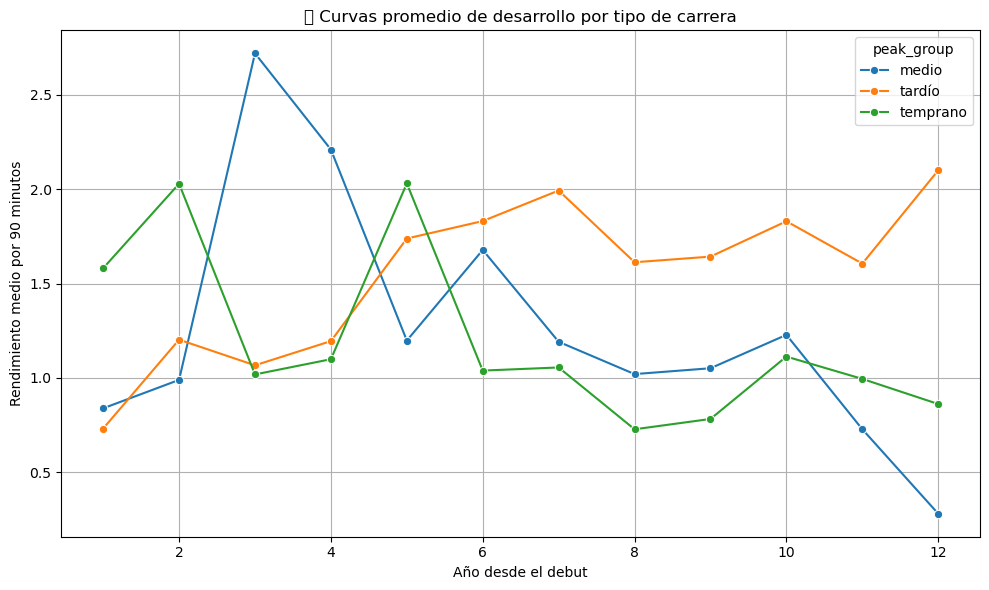

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=group_curves, x='year_since_debut', y='rating_per_90', hue='peak_group', marker='o')

plt.title("📈 Curvas promedio de desarrollo por tipo de carrera")
plt.xlabel("Año desde el debut")
plt.ylabel("Rendimiento medio por 90 minutos")
plt.grid(True)
plt.tight_layout()
plt.show()


# ETAPA 11 — Percentiles por grupo de carrera

En esta subetapa vamos a enriquecer la visualización de curvas promedio incluyendo **percentiles 25, 50 y 75** para cada grupo de carrera (`peak_group`).

### ¿Por qué usar percentiles?
- Nos permite ver **la variabilidad real dentro de cada grupo**
- La mediana (`p50`) puede diferir de la media
- Los percentiles (`p25`, `p75`) nos ayudan a dibujar una **banda intercuartil (IQR)** que muestra dónde se ubica el 50% de los jugadores de cada tipo

Esto es clave para comparar la curva de un jugador con su grupo y entender si está **por encima o por debajo de lo esperado**.


In [ ]:
# Reusamos career_with_groups y calculamos percentiles por grupo y año
group_percentiles = (
    career_with_groups
    .groupby(['peak_group', 'year_since_debut'])['rating_per_90']
    .agg([
        ('p25', lambda x: x.quantile(0.25)),
        ('p50', 'median'),
        ('p75', lambda x: x.quantile(0.75))
    ])
    .reset_index()
)


C:\Users\juanm\AppData\Local\Temp\ipykernel_35096\1914141623.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\futpeak\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


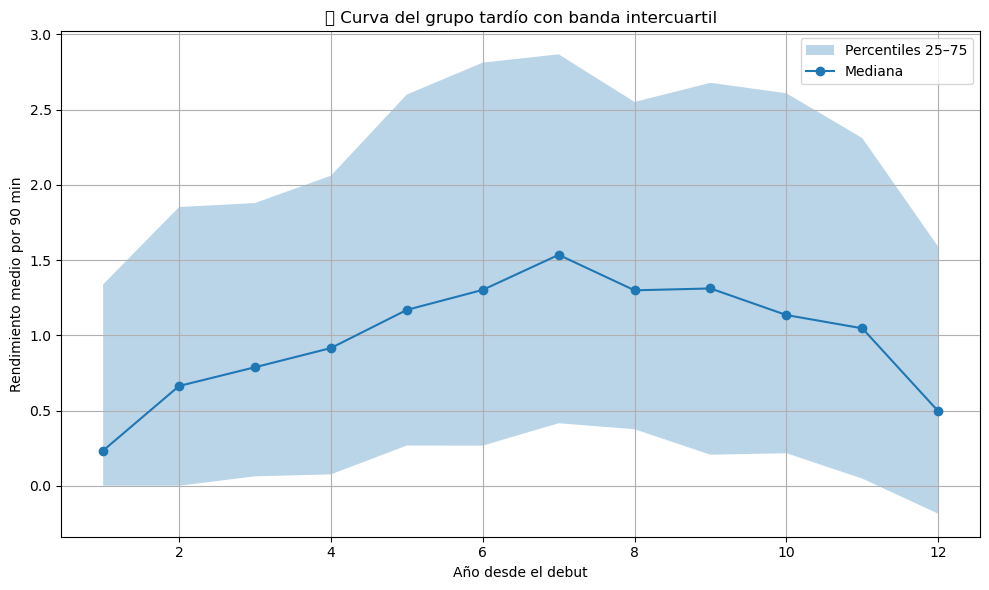

In [ ]:
import matplotlib.pyplot as plt

# Seleccionamos el grupo que queremos graficar
grupo = "tardío"  # cambiar por 'temprano' o 'medio' si querés otro
subset = group_percentiles[group_percentiles['peak_group'] == grupo]

# Graficamos curva con banda intercuartil
plt.figure(figsize=(10, 6))
plt.fill_between(subset['year_since_debut'], subset['p25'], subset['p75'], alpha=0.3, label='Percentiles 25–75')
plt.plot(subset['year_since_debut'], subset['p50'], marker='o', label='Mediana')

plt.title(f"📊 Curva del grupo {grupo} con banda intercuartil")
plt.xlabel("Año desde el debut")
plt.ylabel("Rendimiento medio por 90 min")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ETAPA 12 — Comparación de un jugador individual con su grupo predicho

Esta etapa nos permite validar el modelo **jugador por jugador**.

### ¿Qué haremos?
- Seleccionar un `Player_ID` del conjunto de test (`X_test`)
- Ver qué grupo de evolución (`peak_group`) predice el modelo para ese jugador
- Compararlo con su grupo real (etiqueta original)
- Visualizar la curva real de ese jugador a lo largo de sus años de carrera
- Superponer esa curva con la media de su grupo predicho

### ¿Para qué sirve esto?
- Validamos visualmente si el modelo está captando bien la progresión
- Vemos si el jugador **sigue la curva típica** de su grupo
- Identificamos si hay **casos donde el modelo acierta o se equivoca con lógica**

Este tipo de análisis es clave para scouting real: podés decir "este jugador progresa como otros tardíos", o "parece un talento precoz".


In [ ]:
import matplotlib.pyplot as plt

def plot_player_vs_group(player_id, y_true, y_pred, career_data, group_curves):
    """
    Compara la curva real de un jugador con la curva promedio de su grupo predicho.
    
    Parámetros:
    - player_id: ID del jugador
    - y_true: pandas Series con clases reales (índice = Player_ID)
    - y_pred: pandas Series o array con clases predichas (mismo orden que y_true)
    - career_data: DataFrame con columnas ['Player_ID', 'year_since_debut', 'rating_per_90']
    - group_curves: DataFrame con columnas ['peak_group', 'year_since_debut', 'p50']
    """

    # Obtener la clase real y predicha
    real_group = y_true.loc[player_id]
    pred_group = y_pred.loc[player_id] if isinstance(y_pred, pd.Series) else y_pred[y_true.index.get_loc(player_id)]

    # Filtrar datos del jugador
    player_data = career_data[career_data['Player_ID'] == player_id].sort_values('year_since_debut')

    # Curva promedio del grupo predicho
    group_data = group_curves[group_curves['peak_group'] == pred_group]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['year_since_debut'], player_data['rating_per_90'],
             marker='o', label=f'Jugador {player_id}', color='black')
    plt.plot(group_data['year_since_debut'], group_data['p50'],
             label=f'Grupo predicho: {pred_group}', linestyle='--', color='orange')

    # Estética
    plt.title(f"📊 Evolución del jugador {player_id} vs grupo '{pred_group}'")
    plt.xlabel("Año desde el debut")
    plt.ylabel("Rendimiento por 90 minutos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Mostrar en texto si acertó
    print(f"🎯 Real: {real_group} | 🤖 Predicho: {pred_group}")
    if real_group == pred_group:
        print("✅ ¡El modelo acertó!")
    else:
        print("❌ El modelo se equivocó.")



C:\Users\juanm\AppData\Local\Temp\ipykernel_35096\1863967290.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


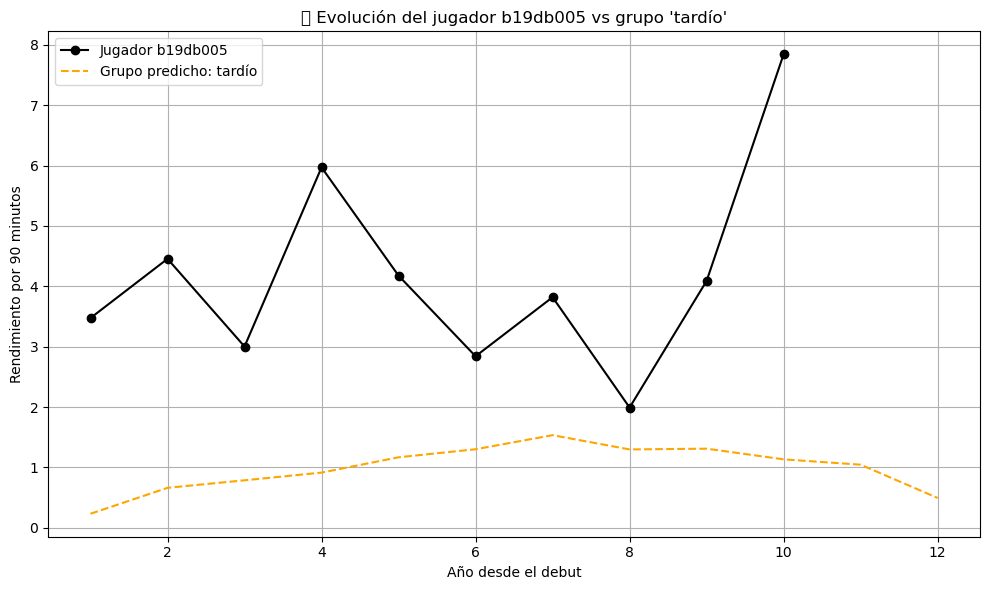

🎯 Real: tardío | 🤖 Predicho: tardío
✅ ¡El modelo acertó!


In [ ]:
# Asegurarse de que las predicciones tienen índice correcto
y_test_named = pd.Series(y_test.values, index=X_test.index)
y_pred_named = pd.Series(y_pred, index=X_test.index)

# Player_ID elegido
player_id = 'b19db005' # Ousmane Dembelé

# Visualizar comparación
plot_player_vs_group(player_id, y_test_named, y_pred_named, career_with_groups, group_percentiles)




In [ ]:
print("Player_IDs en el test set:")
print(X_test.index.tolist())


Player_IDs en el test set:
['161b89a2', 'b7668b24', '90a0bb3b', 'fe529f25', '383659ff', 'f5e28e85', 'e6afdccd', '9c1245f8', '43d5c062', '3dd738a1', '01eb744d', 'c17bfb65', '815f4240', '53dab9a5', 'e0016d00', '6a7179a2', '3423f250', 'f2525782', '96f2d977', 'a45953d6', 'fdc73185', '535b0343', 'a919be14', 'd1a10776', 'd63275fe', 'b6bd2b80', '3d0fd3d7', '888a1498', '97bfa797', '91c2ee76', '45de2ad4', 'f50a3b89', '85cea0cf', '8f8809b9', '9b6f7fd5', 'fc4e7637', '6cbfd71e', 'a36b5bcd', '1da79504', '8c6c6096', '8c45dfe7', '2aebc81b', '6cd03c86', '86f36018', 'd43c4b3a', '766f48dd', '4d24c218', '810033a1', 'dc15d0c2', '0ece60f7', '214a16c5', '70453417', '40b363e3', '55934138', '29939a1d', 'f87818d3', '493fbcae', 'ab874ea3', '46667801', '5d42d487', '95b50253', 'e75dc411', 'e6ff541d', '6191093d', '74758396', '5b33b84c', 'bbc22a16', '15741f49', '4e0dae8d', 'c7c8df2d', 'c59a88d3', '3f79a1c8', 'b3c7d02d', '39ab758c', '1d0f6f63', 'e552cdf1', 'c69ef855', 'bffd5e50', '6027a024', '6009bf94', 'ced1d98f', 